 INDICE
 IMPORT DATI


1.1 Manipolazione e Visualizzazione di Dati Mancanti in un DataFrame con Pandas.

1.2 Analisi e Visualizzazione Dati con Pandas, NumPy e Matplotlib.

1.3 Generazione di un DataFrame Casuale con Dati Mancanti e Imputazione Condizionale in Pandas.

1.4 Calcolo della Percentuale di Dati Mancanti per ciascuna Colonna nel DataFrame.


 GESTIONI DATI MANCANTI


2.1 Creazione di un DataFrame con Dati Mancanti in Pandas.

2.2 Identificazione delle Righe con Dati Mancanti nel DataFrame.

2.3 Conteggio delle Righe con Dati Mancanti nel DataFrame.

2.4 Creazione di un DataFrame con Dati Mancanti da un Dataset in Python utilizzando Pandas.

2.5 Creazione di un Nuovo DataFrame Senza Righe con Dati Mancanti.

2.6 Rimozione Permanente delle Righe con Dati Mancanti dal DataFrame.

2.7 Visualizzazione delle Mancate Osservazioni con un Heatmap.

2.8 Creazione di un Nuovo DataFrame con Riempiimento di Valori Mancanti nelle Colonne Categoriche.

2.9 Creazione di un DataFrame con Dati Numerici e Valori Mancanti Utilizzando Pandas.

2.10 Verifica della Presenza di Valori Mancanti nel DataFrame utilizzando df.isnull().

2.11 Calcolo del Numero di Valori Mancanti per Colonna e Lunghezza Totale del DataFrame.

2.12 Calcolo della Percentuale di Valori Mancanti per Colonna nel DataFrame.

2.13 Funzione per la Gestione dei Valori Mancanti in un DataFrame utilizzando Pandas.

2.14 Identificazione dei Valori Mancanti in un DataFrame utilizzando la Funzione check_missing_values.

2.15 Creazione di una Matrice di Valori Mancanti nel DataFrame utilizzando Pandas.

2.16 Generazione di Dati Casuali per l'Esplorazione con Pandas e NumPy.

2.17 Identificazione e Conteggio dei Valori Mancanti in Ciascuna Colonna del DataFrame.

# IMPORT DATI

## Manipolazione e Visualizzazione di Dati Mancanti in un DataFrame con Pandas

Questo codice utilizza Pandas per creare un DataFrame da un dataset con dati mancanti. I dati mancanti sono rappresentati come `None` o `NaN`. Viene poi sostituito `None` con `NaN` e infine il DataFrame viene stampato.

In [5]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},  # None: nessuno dato mancante
    {"età": 23, "punteggio": 77, "ammesso": None},
]

# Creazione del DataFrame
df = pd.DataFrame(dataset)

# Sostituisci i valori None con NaN
df = df.where(pd.notna(df), None)

# Visualizza il DataFrame
print(df)

    età  punteggio  ammesso
0  25.0       90.0      1.0
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN


## Analisi e Visualizzazione Dati con Pandas, NumPy e Matplotlib

Questo codice utilizza Pandas per leggere un file CSV contenente dati sui Pokémon. Il percorso del file CSV è specificato nella variabile `percorso_file_csv`. Successivamente, il contenuto del file viene letto in un DataFrame utilizzando `pd.read_csv()`, e infine, le prime righe del DataFrame vengono stampate con `print(df.head())`.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specifica il percorso del tuo file CSV
percorso_file_csv = "/Users/ayoubchatir/Desktop/Pokemon.csv"

# Leggi il file CSV in un DataFrame
df = pd.read_csv(percorso_file_csv)

# Mostra le prime righe del DataFrame (opzionale)
print(df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


## Generazione di un DataFrame Casuale con Dati Mancanti e Imputazione Condizionale in Pandas

Il codice utilizza le librerie `Pandas` e `NumPy` per creare un DataFrame casuale con dati mancanti. Vengono generate colonne categoriche e numeriche, e vengono introdotti casualmente valori mancanti. Successivamente, vengono gestiti i dati mancanti nelle colonne categoriche sostituendo con la moda e nelle colonne numeriche calcolando medie condizionate basate su una categoria specifica. Infine, il DataFrame risultante viene stampato.

In [11]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.05 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan

# Elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df = df.dropna(subset=["NumCol1", 'NumCol2','NumCol3'], how='all')


numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.05 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan

# Elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df = df.dropna(subset=["NumCol1", 'NumCol2','NumCol3'], how='all')


numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
df
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,Y,-0.391604,98.0,0.409815
1,A,X,0.000551,19.0,0.886592
2,C,Y,1.266001,52.0,0.848556
3,A,X,0.449617,70.0,0.546525
4,B,X,0.742505,72.0,0.467257
...,...,...,...,...,...
9999995,A,Y,0.464663,7.0,0.992815
9999996,A,X,0.149775,13.0,0.731368
9999997,C,Y,-0.608376,1.0,0.606349
9999998,C,Y,0.000101,69.0,0.115812


## Calcolo della Percentuale di Dati Mancanti per ciascuna Colonna nel DataFrame

Questo codice calcola la percentuale di valori mancanti per ciascuna colonna nel DataFrame `df`. `df.isnull().sum()` restituisce il numero totale di valori mancanti per ciascuna colonna, e `(len(df))` restituisce il numero totale di righe nel DataFrame. Quindi, `(df.isnull().sum() / len(df)) * 100` calcola la percentuale di valori mancanti per ogni colonna moltiplicando il rapporto di valori mancanti per il numero totale di righe per 100. Il risultato viene assegnato alla variabile `missing_percent`. Questo può essere utile per valutare quanto siano presenti valori mancanti nelle diverse colonne del DataFrame.

In [12]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent 

CatCol1    0.0
CatCol2    0.0
NumCol1    0.0
NumCol2    0.0
NumCol3    0.0
dtype: float64

# GESTIONI DATI MANCANTI

## Creazione di un DataFrame con Dati Mancanti in Pandas

Questo codice utilizza la libreria Pandas per creare un DataFrame da un insieme di dati rappresentati in formato di dizionario. Il DataFrame è una struttura tabellare simile a un foglio di calcolo. I dati in questo caso contengono informazioni sull'età, il punteggio e l'ammissione di alcuni individui, ma presentano valori mancanti rappresentati sia come `None` che come `NaN`. Il DataFrame è una rappresentazione tabellare di questi dati, con le colonne "età", "punteggio" e "ammesso". Questo può essere utile per analizzare e gestire dati con valori mancanti.

In [8]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},
    {"età": 23, "punteggio": 77, "ammesso": None},
]
df = pd.DataFrame(dataset)
df

,età,punteggio,ammesso
0,25.0,90.0,1.0
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [ ]:
df["punteggio"]

## Identificazione delle Righe con Dati Mancanti nel DataFrame

Questo codice utilizza Pandas per identificare e selezionare le righe del DataFrame `df` che contengono almeno un dato mancante. La variabile `righe_con_dati_mancanti` conterrà solo le righe che soddisfano questa condizione. In altre parole, stai ottenendo un sottoinsieme del DataFrame originale che include solo le righe con valori mancanti in almeno una colonna. Questo può essere utile per ispezionare o manipolare specificamente le righe con dati mancanti nel tuo set di dati.

In [6]:
righe_con_dati_mancanti =df[df.isnull().any(axis=1)]
righe_con_dati_mancanti

,età,punteggio,ammesso
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


## Conteggio delle Righe con Dati Mancanti nel DataFrame

Questo codice calcola il numero totale di righe nel DataFrame `righe_con_dati_mancanti` utilizzando l'attributo `shape` e selezionando la dimensione delle righe (indice 0). Quindi, la variabile `righe_con_dati_mancanti` conterrà il conteggio totale delle righe che presentano almeno un dato mancante nel DataFrame originale `df`.

In [7]:
righe_con_dati_mancanti =righe_con_dati_mancanti.shape[0]
righe_con_dati_mancanti

5

## Creazione di un DataFrame con Dati Mancanti da un Dataset in Python utilizzando Pandas

Questo codice crea un DataFrame `df` utilizzando il modulo pandas. Il DataFrame è costruito a partire da un elenco di dizionari `dataset`, dove ciascun dizionario rappresenta una riga del DataFrame. Ogni dizionario contiene informazioni su "nome", "età", "punteggio" ed "email". Se un valore è mancante, viene rappresentato come `None`. Il DataFrame finale è quindi stampato.

In [19]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
1,Bob,22,NaN,None
2,Charlie,28,75.0,charlie@email.com


## Creazione di un Nuovo DataFrame Senza Righe con Dati Mancanti

Questo codice utilizza il metodo `dropna` del DataFrame per rimuovere tutte le righe che contengono almeno un valore mancante. Il parametro `inplace=False` indica che la modifica non deve essere effettuata direttamente sul DataFrame originale, ma piuttosto restituisce un nuovo DataFrame (`df1`) con le righe contenenti dati mancanti rimosse.

In [20]:
df1=df.dropna(inplace=False)
df1

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


## Rimozione Permanente delle Righe con Dati Mancanti dal DataFrame

Questo codice utilizza il metodo `dropna` del DataFrame con il parametro `inplace=True`. Ciò significa che rimuove direttamente le righe contenenti dati mancanti dal DataFrame originale `df`, senza restituire un nuovo DataFrame. L'effetto è che `df` stesso viene modificato e ora contiene solo le righe senza dati mancanti.

In [21]:
df.dropna(inplace=True)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


## Visualizzazione delle Mancate Osservazioni con un Heatmap

Questo codice utilizza la libreria `seaborn` per generare un heatmap, una rappresentazione grafica dei dati, che visualizza la presenza di valori mancanti nel DataFrame `df`. La heatmap colora le celle in base alla presenza di dati mancanti: le celle vuote o con valori mancanti sono evidenziate in colore diverso rispetto a quelle contenenti dati. Questa rappresentazione fornisce una visione immediata della distribuzione dei dati mancanti nel DataFrame.

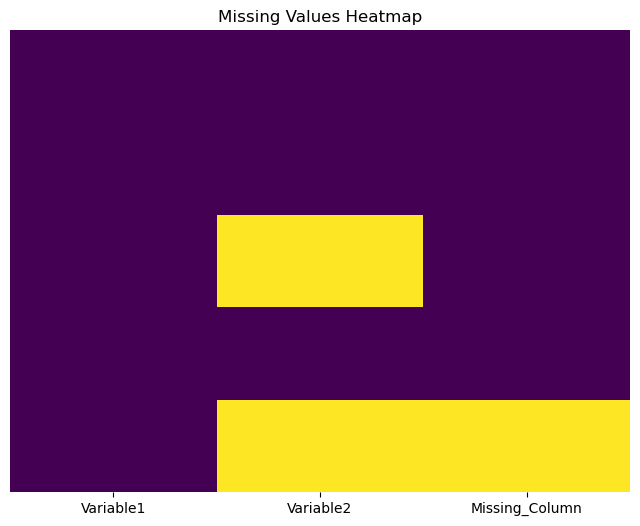

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}

# Crea un DataFrame
df = pd.DataFrame(data)

# Visualizza un heatmap delle mancate osservazioni
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Creazione di un Nuovo DataFrame con Riempiimento di Valori Mancanti nelle Colonne Categoriche

Questo codice crea un nuovo DataFrame vuoto chiamato `df1`. Successivamente, vengono selezionate le colonne di tipo categorico dal DataFrame originale `df`. I valori mancanti nelle colonne categoriche vengono quindi riempiti con un valore specificato, che dovrebbe essere sostituito con il valore effettivo desiderato per il riempimento dei dati mancanti. Infine, le colonne riempite vengono assegnate al nuovo DataFrame `df1`.

In [7]:
# Crea un DataFrame vuoto
df1 = pd.DataFrame()

# Seleziona colonne di tipo categorico
colonne_categoriche = df.select_dtypes(exclude=['number'])

# Riempi i valori mancanti nelle colonne categoriche e assegna a df1
# Sostituisci 'tuo_valore_di_riempimento' con il valore effettivo che desideri utilizzare per riempire i valori mancanti
df1[colonne_categoriche.columns] = df[colonne_categoriche.columns].fillna(value='tuo_valore_di_riempimento')

## Creazione di un DataFrame con Dati Numerici e Valori Mancanti Utilizzando Pandas

Il codice utilizza la libreria pandas per creare un DataFrame chiamato `df` con tre colonne ('Feature1', 'Feature2', 'Feature3'), contenenti dati numerici. Alcuni valori sono rappresentati come `np.nan`, indicando dati mancanti. Questi valori possono essere gestiti tramite tecniche come l'imputazione o la rimozione delle righe o colonne con dati mancanti, in base alle esigenze analitiche del progetto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,NaN,5.0


## Verifica della Presenza di Valori Mancanti nel DataFrame utilizzando df.isnull()

Il codice `df.isnull()` restituisce un DataFrame di valori booleani con la stessa forma di `df`, dove ogni elemento è True se il corrispondente elemento in `df` è un valore mancante (`NaN`), e False altrimenti. Questo è utile per identificare la presenza di dati mancanti nel DataFrame originale.

In [3]:
df.isnull()

,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


## Calcolo del Numero di Valori Mancanti per Colonna e Lunghezza Totale del DataFrame

Il codice `df.isnull().sum()` restituisce una Serie che mostra il numero totale di valori mancanti per ciascuna colonna nel DataFrame `df`. Nel frattempo, `len(df)` restituisce la lunghezza totale del DataFrame, ovvero il numero totale di righe. La combinazione di questi due comandi fornisce la percentuale di valori mancanti per ciascuna colonna nel DataFrame, poiché il numero totale di valori mancanti diviso per il numero totale di righe dà una percentuale.

In [30]:
df.isnull().sum()
len(df)

5

## Calcolo della Percentuale di Valori Mancanti per Colonna nel DataFrame

Questo codice calcola la percentuale di valori mancanti per ciascuna colonna nel DataFrame `df`. `df.isnull().sum()` restituisce il numero totale di valori mancanti per ogni colonna, e dividendo questo valore per la lunghezza totale del DataFrame (`len(df)`) e moltiplicando per 100, ottieni la percentuale di valori mancanti per ogni colonna. Il risultato è memorizzato nella variabile `missing_percent`.

In [5]:
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

## Funzione per la Gestione dei Valori Mancanti in un DataFrame utilizzando Pandas

Il codice definisce una funzione `missingvalues_sub` che gestisce i valori mancanti in un DataFrame, sostituendo la media per le colonne numeriche e la moda per le colonne categoriche. La funzione principale `main` utilizza questa funzione su un DataFrame di esempio, stampando il DataFrame originale e quello con i valori mancanti sostituiti. L'esecuzione del codice avviene solo se il modulo viene eseguito direttamente come script principale.

In [1]:
#creo una funzione che si occupa solo dei missing values 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}

# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()


def missingvalues_sub(df):
    # Trattamento dei missing values nelle variabili numeriche e categoriche
    numeric_cols = df.select_dtypes(include=['number'])
    categorical_cols = df.select_dtypes(exclude=['number'])
    df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean()) #mean()=   
    df1[categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0]) # fillan fil=riempi lan=nan not a mumber/ mode()= sta per moda colonna categoriche  /iloc= per gestice i indici 
    return df1


def main (): # mean im questo caso funzione principale 
    df1=missingvalues_sub(df)
    print(f"il primo con i valori mancanti \n{df} \ne il secondo con i missing values sostituiti \n{df1}")


if __name__ == "__main__":
    main()

il primo con i valori mancanti 
   Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN 
e il secondo con i missing values sostituiti 
   Variable1  Variable2 Missing_Column
0          1   1.000000              A
1          2   2.000000              B
2          3   2.333333              A
3          4   4.000000              C
4          5   2.333333              A


## Identificazione dei Valori Mancanti in un DataFrame utilizzando la Funzione check_missing_values

Il codice `df.isnull()` viene utilizzato per verificare la presenza di valori mancanti nel DataFrame `df`. Il risultato di questa operazione è un DataFrame di dimensioni identiche a `df`, in cui ogni elemento è `True` se il valore corrispondente in `df` è un valore mancante (`NaN`), e `False` altrimenti. Questo è utile per identificare rapidamente la posizione dei valori mancanti nel DataFrame, facilitando eventuali operazioni di gestione dei dati mancanti. Inoltre, questa informazione può essere utilizzata successivamente per prendere decisioni o applicare strategie specifiche per trattare i dati mancanti nel contesto dell'analisi dei dati.

In [2]:
df.isnull() # una funzione che prende il df e dove non ce nulla mette true quindi da il true dove mancano i valori

,Variable1,Variable2,Missing_Column
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True


## Creazione di una Matrice di Valori Mancanti nel DataFrame utilizzando Pandas

Il codice utilizza la libreria `pandas` per creare un DataFrame `df` con dati di esempio, compresi alcuni valori mancanti rappresentati come `NaN` (Not a Number). Successivamente, viene eseguita l'operazione `df.isnull()`, che restituisce una tabella booleana chiamata `missing_matrix`. Questa tabella ha le stesse dimensioni di `df`, e ogni elemento è `True` se il valore corrispondente in `df` è mancante (`NaN`), altrimenti è `False`. La `missing_matrix` fornisce una visione chiara della presenza di dati mancanti nel DataFrame, rendendo più facile identificare le colonne o le righe che ne contengono. Questa informazione è utile per valutare l'impatto dei dati mancanti e decidere eventuali strategie di gestione.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],# feature1 manda 1 dato
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

missing_matrix = df.isnull()

missing_matrix # tabella dei dati mandanti

,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


## Generazione di Dati Casuali per l'Esplorazione con Pandas e NumPy

Il codice utilizza le librerie `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, e `plotly.express` per creare un DataFrame chiamato `df` contenente dati casuali per l'esplorazione. Il DataFrame include colonne come 'Età', 'Genere', 'Punteggio', e 'Reddito', con valori generati casualmente attraverso diverse funzioni di generazione di numeri casuali. Successivamente, le prime 50 righe del DataFrame vengono stampate per visualizzare una parte iniziale dei dati. Questo tipo di dataset casuale può essere utilizzato per scopi di analisi esplorativa e test di visualizzazione dei dati.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 70, size=1000),#randint= numeri interi / size secera mille volte
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),
    'Punteggio': np.random.uniform(0, 100, size=1000),# uniform= seglio un numero casuale tra 0 e 100 per mille volte(size) dove ogli numero ha la probalita di uscire  
    'Reddito': np.random.normal(50000, 15000, size=1000)#genere 100 numeri casuale presi da una distribuzzione normale tra 5000 e 15000
}
# Genera dati casuali per l'esplorazione
df = pd.DataFrame(data)
#visualizza le prime rige del dataset 
print(df.head(50))# tail se vuoi i ultimi numeri 

    Età   Genere  Punteggio       Reddito
0    56  Maschio  85.120691  52915.764524
1    69  Maschio  49.514653  44702.505608
2    46  Maschio  48.058658  55077.257652
3    32  Femmina  59.240778  45568.978848
4    60  Maschio  82.468097  52526.914644
5    25  Maschio  34.780921  69763.963034
6    38  Maschio  67.801615  34901.861521
7    56  Femmina  56.573196  67098.178417
8    36  Femmina  26.702827  69756.726010
9    40  Maschio  87.862999  48228.972095
10   28  Maschio  79.742602  18172.176515
11   28  Maschio  65.845183  40882.670194
12   41  Maschio  85.058173  69454.918198
13   53  Femmina  86.729420  49656.979066
14   57  Femmina  70.836298  35010.466516
15   41  Femmina  83.701333  42428.376182
16   20  Femmina  69.747146  62609.300398
17   39  Maschio  68.014077  58201.003523
18   19  Maschio  61.861138  46416.018512
19   41  Maschio  75.271664  44497.633823
20   61  Femmina  15.860511  44123.627764
21   47  Maschio  88.087076  36163.847233
22   55  Femmina  87.184353  74230

## Analisi delle Informazioni del DataFrame e Statistiche Descrittive

Il codice utilizza due metodi di `pandas` per ottenere informazioni sul DataFrame `df`. La prima riga, `print(df.info())`, restituisce informazioni dettagliate su ciascuna colonna del DataFrame, compresi i tipi di dati e il numero di valori non nulli. La seconda riga, `print(df.describe())`, fornisce statistiche riassuntive come la media, la deviazione standard, i valori minimi, i quartili e i valori massimi per le colonne numeriche del DataFrame. Questi due metodi sono utili per ottenere una panoramica rapida e completa delle caratteristiche del dataset.

In [6]:
print(df.info())# da informazione su tutte le ficules del df
print(df.describe()) # con una parola li fai fare tutto mediana min max...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Età        1000 non-null   int64  
 1   Genere     1000 non-null   object 
 2   Punteggio  1000 non-null   float64
 3   Reddito    1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB
None
              Età    Punteggio       Reddito
count  1000.00000  1000.000000   1000.000000
mean     43.81900    50.471078  50241.607607
std      14.99103    29.014970  14573.000585
min      18.00000     0.321826   4707.317663
25%      31.00000    24.690382  40538.177863
50%      44.00000    51.789520  50099.165858
75%      56.00000    75.549365  60089.683773
max      69.00000    99.941373  97066.228005


## Identificazione e Conteggio dei Valori Mancanti in Ciascuna Colonna del DataFrame

Il codice utilizza il metodo `isnull()` di pandas per identificare i valori mancanti nel DataFrame `df` e successivamente applica `sum()` per ottenere il numero totale di valori mancanti per ciascuna colonna. La variabile `missing_data` contiene quindi il conteggio dei valori mancanti per ogni colonna, e l'output del codice stampa questa informazione, fornendo il numero di valori mancanti per ciascuna colonna nel DataFrame.

In [15]:
missing_data = df.isnull().sum()
print("Valori mancanti per ciascuna colonna: ")
print(missing_data)

Valori mancanti per ciascuna colonna: 
Feature1    1
Feature2    2
Feature3    1
dtype: int64
